In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import requests
from pathlib import Path
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor


if Path('helper_function.py').is_file():
  print('Already Exists, Skipping Download....')
else:
  print('Downloading helper_function.py')
  url = 'https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py'
  request = requests.get(url)
  with open('helper_function.py', 'wb') as f:
    f.write(request.content)

# Exercise # 1


In [2]:
train_data = datasets.MNIST(root = 'data',
                            train = True,
                            download = True,
                            transform= ToTensor(),
                            target_transform = None)

test_data = datasets.MNIST(root = 'data',
                           train = False,
                           download = True,
                           transform = ToTensor(),
                           target_transform = None)

100%|██████████| 9912422/9912422 [00:00<00:00, 115375595.58it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 24651138.34it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 24919257.59it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 11134148.90it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
print(train_data,'\n\n', test_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() 

 Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [4]:
class_names = train_data.classes
num_labels = train_data.targets

class_names, num_labels

(['0 - zero',
  '1 - one',
  '2 - two',
  '3 - three',
  '4 - four',
  '5 - five',
  '6 - six',
  '7 - seven',
  '8 - eight',
  '9 - nine'],
 tensor([5, 0, 4,  ..., 5, 6, 8]))

In [5]:
image, label = train_data[0]
image.shape, label

(torch.Size([1, 28, 28]), 5)

### Exercise # 2

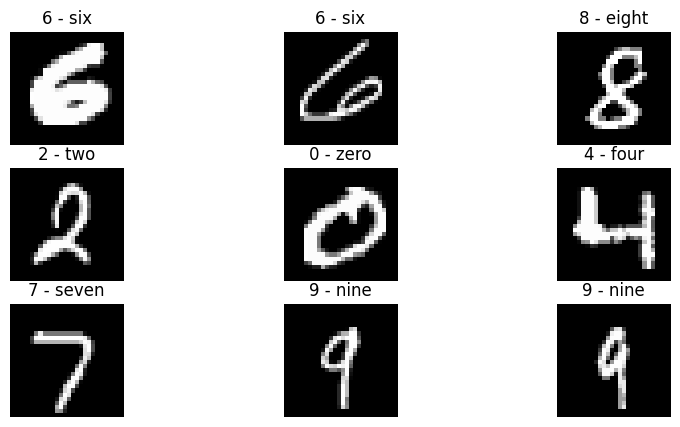

In [6]:
torch.manual_seed(42)
fig = plt.figure(figsize=[10,5])
nrows = 3
ncols = 3

for i in range(1,nrows*ncols+1):
  rand_datapoints = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[rand_datapoints]
  fig.add_subplot(nrows,ncols,i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)


### Exercise # 3

In [7]:
train_dataloader = DataLoader(dataset = train_data,
                              batch_size= 32,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = 32,
                             shuffle = False)

In [8]:
print(f"Length of train dataloader: {len(train_dataloader)} | Batch size: {train_dataloader.batch_size}")
print(f"Length of test dataloader: {len(test_dataloader)} | Batch size: {test_dataloader.batch_size}")


Length of train dataloader: 1875 | Batch size: 32
Length of test dataloader: 313 | Batch size: 32


### Exercise # 4

In [9]:
# creating a class for CNN Model

class fashionCNNmodelV2(nn.Module):
  def __init__(self, input_features: int, hidden_units: int, output_features: int):
    super().__init__()

    self.cnn_block1 = nn.Sequential(
        nn.Conv2d(in_channels = input_features, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )

    self.cnn_block2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )

    self.linear_layer  = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*49, out_features = output_features)
    )

  def forward(self, x: torch.Tensor)-> torch.Tensor:
    x = self.cnn_block1(x)
    # print(f"Shape after block 1: {x.shape}")
    x = self.cnn_block2(x)
    # print(f"Shape after block 2: {x.shape}")
    x = self.linear_layer(x)
    # print(f"Shape after linear: {x.shape}")
    return x


In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [11]:
model1 = fashionCNNmodelV2(input_features = 1, hidden_units = 10, output_features= len(class_names)).to(device)
model1

fashionCNNmodelV2(
  (cnn_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (cnn_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [12]:
image.shape

torch.Size([1, 28, 28])

In [13]:
model1(image.unsqueeze(0).to(device))

tensor([[ 0.0306, -0.0449,  0.0263, -0.0072,  0.0564, -0.0044, -0.0601,  0.0539,
         -0.0432,  0.0321]], grad_fn=<AddmmBackward0>)

### Exercise # 5

In [14]:
# make a function to calculate training time of models

from timeit import default_timer as timer

def print_traintime(start:float,
                    end:float,
                    device: torch.device = None):
  totaltime = end - start
  return f"Train time on {device}: {totaltime:3f} seconds."

In [15]:
# make a function for training a model
from tqdm.auto import tqdm

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_func: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_func,
               device: torch.device = None):

  trainLoss, trainAcc = 0,0
  for batch, (train_img, train_label) in enumerate(data_loader):
    train_img, train_label = train_img.to(device), train_label.to(device)
    model.train()
    train_preds = model(train_img)
    loss = loss_func(train_preds, train_label)
    trainLoss += loss
    trainAcc += accuracy_func(train_label, train_preds.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch* len(train_img)}/{len(data_loader.dataset)} samples.")
  trainLoss /= len(data_loader)
  trainAcc /= len(data_loader)
  print(f"\nTrain-Loss: {trainLoss:4f} | Train-Accuracy: {trainAcc:2f}")



In [16]:
# make a function for testing a model

def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_func: torch.nn.Module,
              accuracy_func,
              device: torch.device=None):
  testLoss, testAcc = 0,0
  model.eval()
  with torch.inference_mode():
    for test_img, test_label in tqdm(data_loader):
      test_img, test_label = test_img.to(device), test_label.to(device)
      test_preds = model(test_img)
      testLoss += loss_func(test_preds, test_label)
      testAcc += accuracy_func(test_label, test_preds.argmax(dim=1))
    testLoss /= len(data_loader)
    testAcc /= len(data_loader)
    print(f"Test-Loss: {testLoss:4f} | Test-Accuracy: {testAcc:.2f}")

In [17]:
# setting up a loss function and also an optimizer for the model

from helper_function import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
model_optimizer = torch.optim.SGD(params = model1.parameters(),
                            lr = 0.1)

In [ ]:
start_time = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n--------')
  train_step(model1, train_dataloader, loss_fn, model_optimizer, accuracy_fn, device)
  test_step(model1, test_dataloader, loss_fn, accuracy_fn, device)
end_time = timer()
model1_time = print_traintime(start_time, end_time, device)
print(model1_time)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train-Loss: 0.309698 | Train-Accuracy: 89.516667


  0%|          | 0/313 [00:00<?, ?it/s]

Test-Loss: 0.090774 | Test-Accuracy: 97.14
Epoch: 1
--------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train-Loss: 0.087595 | Train-Accuracy: 97.255000


  0%|          | 0/313 [00:00<?, ?it/s]

Test-Loss: 0.072158 | Test-Accuracy: 97.58
Epoch: 2
--------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train-Loss: 0.066231 | Train-Accuracy: 97.920000


  0%|          | 0/313 [00:00<?, ?it/s]

Test-Loss: 0.061702 | Test-Accuracy: 98.02
Train time on cpu: 186.735485 seconds.


### Exercise # 6

In [ ]:
# make a function to evaluate the model

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_func: torch.nn.Module,
               acuuracy_func):
  model.eval()
  loss, acc = 0, 0

  with torch.inference_mode():
    for img, label in (data_loader):
      img, label = img.to(device), label.to(device)
      preds = model(img)
      loss += loss_func(preds, label)
      acc += accuracy_fn(label, preds.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)
    return {
        "Model Name": model.__class__.__name__,
        "Model Loss": loss,
        "Model Accuracy": acc
    }


In [ ]:
model1_results = eval_model(model1, test_dataloader, loss_fn, accuracy_fn)
model1_results

{'Model Name': 'fashionCNNmodelV2',
 'Model Loss': tensor(0.0617),
 'Model Accuracy': 98.02316293929712}

In [ ]:
# make a function to make predictions for the model

def make_predictions(model:torch.nn.Module,
                     data: int,
                     device: torch.device= None):
  preds_list = []

  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)
      logits = model(sample)
      pred_probs = torch.softmax(logits.squeeze(), dim=0)
      preds_list.append(pred_probs.cpu())

  return torch.stack(preds_list)


In [ ]:
import random
# random.seed(42)


prediction_sample_data = []
prediction_label_data = []

for sample, label in random.sample(list(test_data), k=10):
  prediction_sample_data.append(sample)
  prediction_label_data.append(label)


In [ ]:
# comparing the predicted and true labels

model1_predictions = make_predictions(model1, prediction_sample_data, device)
predicted_labels = model1_predictions.argmax(dim=1)
predicted_labels, prediction_label_data

(tensor([2, 8, 4, 2, 0, 9, 5, 8, 2, 1]), [2, 8, 4, 2, 0, 9, 5, 8, 2, 1])

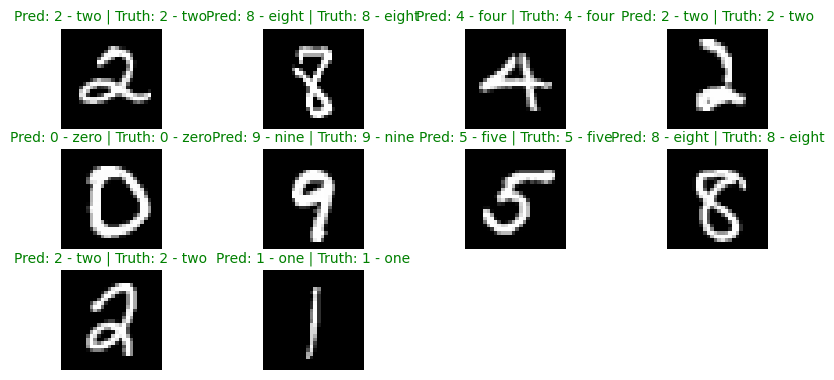

In [ ]:
# plot the predictionns

plt.figure(figsize=(10,6))

rows, cols = 4,4
for i, sample in enumerate(prediction_sample_data):
  plt.subplot(rows, cols, i+1)
  plt.imshow(sample.squeeze(), cmap='gray')
  pred = class_names[predicted_labels[i]]
  truth = class_names[prediction_label_data[i]]
  text = f"Pred: {pred} | Truth: {truth}"
  plt.axis(False)

  if pred == truth:
    plt.title(text, c='g', fontsize = 10)
  else:
    plt.title(text, c='r', fontsize = 10)


In [ ]:
!pip install -q torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 5.0 MB/s eta 0:00:00


### Exercise # 7

In [ ]:
pred_samples = []

model1.eval()
with torch.inference_mode():
  for x,y in tqdm(test_dataloader):
    x,y = x.to(device), y.to(device)
    logits = model1(x)
    preds = torch.softmax(logits, dim=0).argmax(dim=1)
    pred_samples.append(preds.cpu())

  y_pred_tensor = torch.cat(pred_samples)



  0%|          | 0/313 [00:00<?, ?it/s]

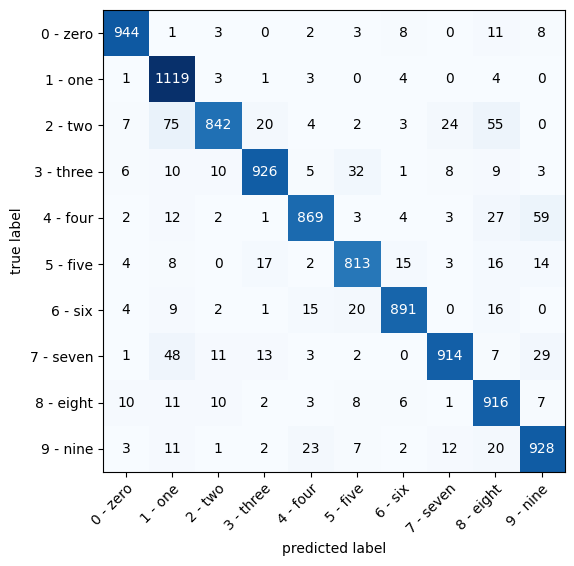

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes = len(class_names), task='multiclass')
confmat_tensor = confmat(preds = y_pred_tensor, target = test_data.targets)

fif, ax = plot_confusion_matrix(conf_mat= confmat_tensor.numpy(),
                                class_names = class_names,
                                figsize = [8,6])